In [ ]:
# Forex Prediction Model

Epoch 0: Loss = 0.135826
Epoch 10: Loss = 0.020448
Epoch 20: Loss = 0.015794
Epoch 30: Loss = 0.005633
Epoch 40: Loss = 0.001062
Epoch 50: Loss = 0.000179
Epoch 60: Loss = 0.000225
Epoch 70: Loss = 0.000170
Epoch 80: Loss = 0.000087
Epoch 90: Loss = 0.000066


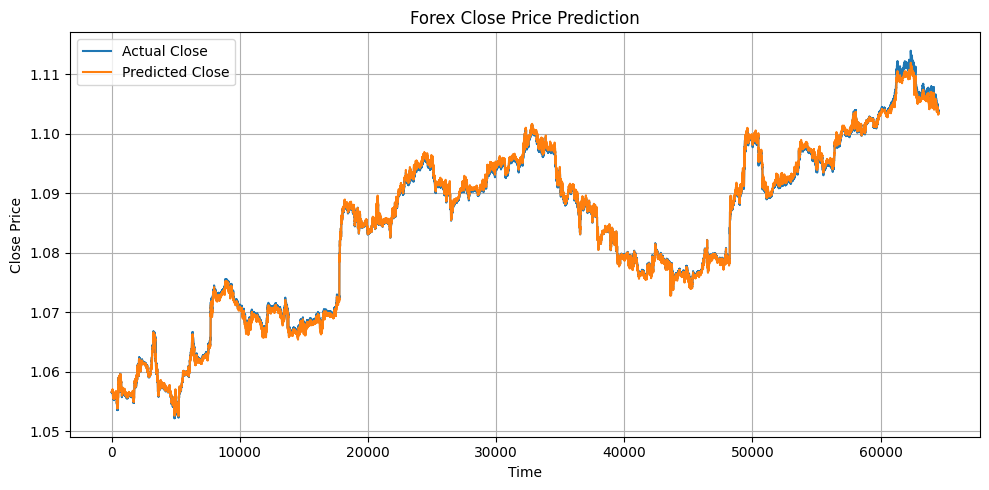

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("file_path")
#df.head()

features = ['Open', 'High', 'Low']
target = ['Close']

scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])
y = scaler.fit_transform(df[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

class ForexModel(nn.Module):
    def __init__(self):
        super(ForexModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3, 64), 
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
    )

    def forward(self, x):
        return self.model(x)

model = ForexModel()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 100
for epoch in range(EPOCHS):
    model.train()
    preds = model(X_train_t)
    loss = loss_fn(preds, y_train_t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print (f"Epoch {epoch}: Loss = {loss.item():.6f}")


model.eval()
with torch.no_grad():
    predicitions = model(X_test_t).numpy()

merged_pred = np.concatenate((X_test[:, :2], predicitions), axis=1)
merged_actual = np.concatenate((X_test[:, :2], y_test), axis=1)
y_pred_inv = scaler.inverse_transform(merged_pred)[:, -1]
y_actual_inv = scaler.inverse_transform(merged_actual)[:, -1]

plt.figure(figsize=(10,5))
plt.plot(y_actual_inv, label = 'Actual Close')
plt.plot(y_pred_inv, label = 'Predicted Close')
plt.title("Forex Close Price Prediction")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
